In [31]:
import pandas as pd
import numpy as np

In [32]:
growth_rate_condition = pd.read_csv('datas.csv')
growth_rate_condition.head()

,crop,temperature,humidity,soil_moisture_level,growth_rate_condition_classification
0,Mustasa,30.1,84.9,80,GOOD
1,Mustasa,31.5,79.2,85,GOOD
2,Mustasa,32.0,76.0,80,GOOD
3,Mustasa,32.2,76.6,80,GOOD
4,Mustasa,32.2,74.5,81,GOOD


In [33]:
growth_rate_condition.shape

(183, 5)

In [34]:
growth_rate_condition.isna().sum()

crop                                    0
temperature                             0
humidity                                0
soil_moisture_level                     0
growth_rate_condition_classification    0
dtype: int64

In [35]:
growth_rate_condition['growth_rate_condition_classification'].unique()

array(['GOOD', 'BAD'], dtype=object)

In [36]:
growth_rate_condition['growth_rate_condition_classification'] = growth_rate_condition['growth_rate_condition_classification'].replace({'GOOD' : 0, 'BAD' : 1})
growth_rate_condition.tail()

,crop,temperature,humidity,soil_moisture_level,growth_rate_condition_classification
178,Mustasa,31.3,75.6,87,0
179,Mustasa,31.5,74.7,87,0
180,Mustasa,31.6,74.4,86,0
181,Mustasa,31.5,72.9,87,0
182,Mustasa,35.3,67.3,81,1


In [37]:
X = growth_rate_condition.drop(['growth_rate_condition_classification'], axis = 1)
X

,crop,temperature,humidity,soil_moisture_level
0,Mustasa,30.1,84.9,80
1,Mustasa,31.5,79.2,85
2,Mustasa,32.0,76.0,80
3,Mustasa,32.2,76.6,80
4,Mustasa,32.2,74.5,81
...,...,...,...,...
178,Mustasa,31.3,75.6,87
179,Mustasa,31.5,74.7,87
180,Mustasa,31.6,74.4,86
181,Mustasa,31.5,72.9,87


In [38]:
X = growth_rate_condition.drop(['crop', 'growth_rate_condition_classification'], axis = 1)
X

,temperature,humidity,soil_moisture_level
0,30.1,84.9,80
1,31.5,79.2,85
2,32.0,76.0,80
3,32.2,76.6,80
4,32.2,74.5,81
...,...,...,...
178,31.3,75.6,87
179,31.5,74.7,87
180,31.6,74.4,86
181,31.5,72.9,87


In [39]:
y = growth_rate_condition['growth_rate_condition_classification']
y

0      0
1      0
2      0
3      0
4      0
      ..
178    0
179    0
180    0
181    0
182    1
Name: growth_rate_condition_classification, Length: 183, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

## Training and Testing the Model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=200)

## Rows for Training Data

In [42]:
X_train.shape

(146, 3)

## Rows for Testing the Data

In [43]:
X_test.shape

(37, 3)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [45]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [47]:
joblib.dump(knn, 'knn_prediction.joblib')

['knn_prediction.joblib']

In [48]:
X_test.head()

,temperature,humidity,soil_moisture_level
123,33.2,68.7,92
5,32.1,73.9,81
75,32.0,76.6,78
181,31.5,72.9,87
57,36.3,56.4,81


In [49]:
# Mapping dictionary for variety names
classification_mapping = {0: 'GOOD', 1: 'BAD'}

# Use the trained model to predict
predicted_values = knn.predict([[35.3,67.3,81]])

# Convert the predicted values to variety names using the mapping
predicted_classification = classification_mapping.get(predicted_values[0])

print("Predicted Classification:", predicted_classification)


Predicted Classification: GOOD


c:\Users\angie\OneDrive\Documents\GitHub\SMARTS\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [50]:
y_test.head()

123    1
5      0
75     0
181    0
57     1
Name: growth_rate_condition_classification, dtype: int64

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [52]:
predictions = knn.predict(X_test)
predictions

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [53]:
cm = confusion_matrix(y_test, predictions)
cm

array([[14,  1],
       [ 0, 22]], dtype=int64)

In [54]:
import seaborn as sns
from matplotlib import pyplot as plt

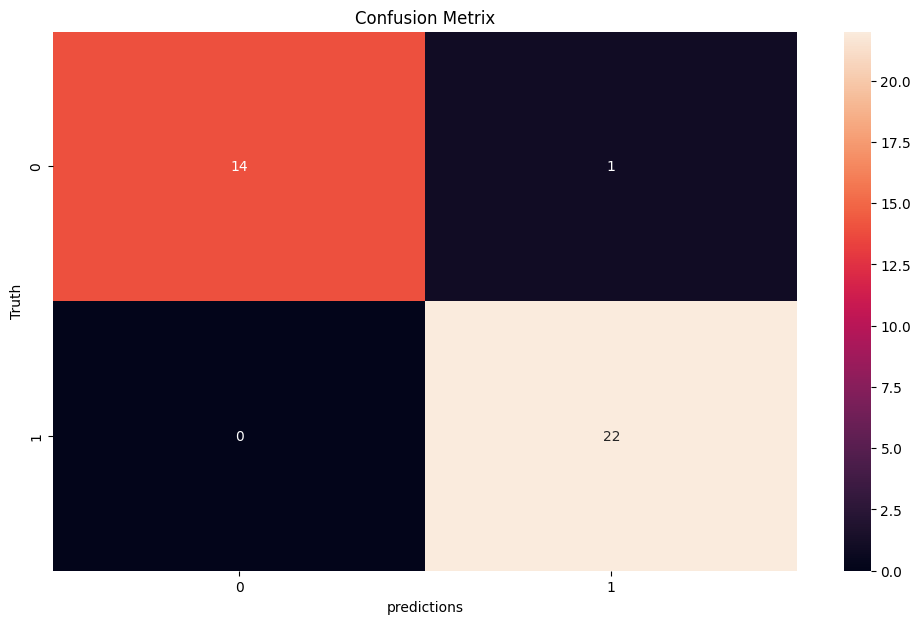

In [55]:
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot = True)
plt.xlabel("predictions")
plt.ylabel("Truth")
plt.title("Confusion Metrix")
plt.show()

In [56]:
accuracy_score(y_test, predictions)

0.972972972972973

In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.96      1.00      0.98        22

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [58]:
knn.score(X_test, y_test)

0.972972972972973